# IMDb EDA

## Introducción
IMDb (Internet Movie Database) es una de las páginas más famosas de películas, que combina la descripción de la película, la puntuación, idioma, y muchos otros aspectos.

El sitio de internet es conocido por contener una gran cantidad de películas (la más antigua es de 1874 - "Passage de Venus") así como películas que todavía están en la fase de planeación (la más nueva para el 2027 - "Avatar 5").

IMDb almacena información de más de 6 millones de títulos (casi 500.000 son películas) y le pertence a Amazon desde 1998.

## Objetivo

El objetivo de este EDA de datos provenientes de IMDb es determinar cuáles son los ingredientes para que una película sea exitosa. **PONER CUAL ES LA METRICA GENERAL

## Contexto

Un breve resumen de la historia de la creación de IMDb se presenta en el video a continuación:

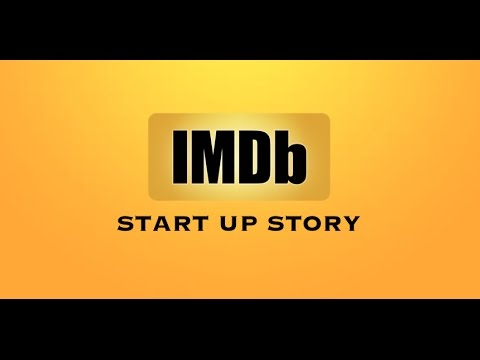

In [45]:
from IPython.display import YouTubeVideo
youtube_video = YouTubeVideo('Bttf6waezco')
display(youtube_video)

## Diccionario de datos
Enlista de forma ordenada los nombres, definiciones y características de los atributos dentro de la base de datos.

|Número| Variable | Definición |
|:----:|:--------:|:----------:|
| 1| imdb_title_id| Identificación de la película en la base de datos|
| 2| title| Título de la película|
| 3| original_title| Título original de la película, normalmente el título por el cual la película es conocida en su país de origen|
| 4| year| Year of earliest release of this title globally|
| 5| date_published| Fecha exacta de publicación de la película|
| 6| genre| Género de la película|
| 7| duration| Duración de la película|
| 8| country| País en el que se grabó la película|
| 9| language| Idioma de la película|
| 10| director| Director de la película|
| 11| writer| Escritor de la película|
| 12| production_company| Compañía que produjo la película|
| 13| actors| Actores y actrices en la película|
| 14| description| Descripción de la película|
| 15| avg_vote| Voto promedio|
| 16| votes| Cantidad de votos registrados|
| 17| buget| Presupuesto de la película|
| 18| usa_gross_income| Ganancias en USA|
| 19| worldwide_gross_income| Ganancias en el mundo|
| 20| metascore| Average of critics' opinion. Needs at least 4 critics' reviews to be calculated|
| 21| reviews_from_users| Reviews that users submit|
| 22| reviews_from_critics| External reviews, they are stored on other sites|

## Ingestión y análisis estructural

Se importa el datasat en formato .csv y se llama a las librerías pandas, numpy y matplotlib.

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

Se llama al primer dataset movies.

In [25]:
movies = pd.read_csv('Datos/movies.csv')

C:\Users\Micaela Rodriguez\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


La alerta generada se debe al tipo de algunas columnas. En este caso, al abrir el file como CSVTable se revisa la cantidad de columnas. Al no ser un archivo grande se utiliza la función "low_memory=False".

In [27]:
movies = pd.read_csv('Datos/movies.csv', low_memory=False, na_values=["NaN",""])

Se procede a imprimir las primeras 5 observaciones del dataset.

In [28]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Seguidamente se utiliza la función "info" para obtener un resumen de los datos estructurales. Esto permite entender el tipo de datos que se tienen, cuánta memoria está gastando dentro de nuestra memoria ram, la cantidad de nulos, entre otros.

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

A partir de la respuesta anterior, se deduce que hay un total de 85855 entradas y 22 columnas. De estas columnas, 4 son de tipo flotante, 2 entero y 16 caracteres (object).

## Análisis semántico

El análisis exploratorio se estructura en tres secciones:
#### Parte 1
Se plantean una serie de preguntas exploratorias:

1. ¿Cuáles son los géneros más comunes dentro del dataset?
2. ¿Cómo se distribuyen las notas a lo largo del dataset?
3. ¿En qué año se publica la mayor cantidad de películas?
4. ¿De qué país son la mayoría de las películas?

#### Parte 2
Seguidamente, se plantean las siguientes hipótesis a validar o rechazar:
* **_Hipótesis 1_** : La nota de los usuarios será similar a la de los críticos
* **_Hipótesis 2_** : Las películas con mejor puntuación serán aquellas de mayor presupuesto

#### Parte 3
Posteriormente se desea analizar la correlación entre las variables para responder a la pregunta:
**¿Qué hace que una película sea exitosa?**

### Parte 1
**1. ¿Cuáles son los géneros más comunes dentro del dataset?**

In [30]:
movies.genre.value_counts()

Drama                       12543
Comedy                       7693
Comedy, Drama                4039
Drama, Romance               3455
Comedy, Romance              2508
                            ...  
Film-Noir, Horror               1
Crime, Adventure, Comedy        1
Sci-Fi, Action, Thriller        1
Crime, War, Drama               1
Action, Thriller, Sci-Fi        1
Name: genre, Length: 1257, dtype: int64

La mayor cantidad de películas dentro del dataset son de la categoría drama, seguidos por comedia y por una combinación de ambos géneros. Ahora, se desea visualizar esta información en un diagrama circular considerando el top 5 de géneros y visualizando dentro del diagrama los porcentajes correspondientes a cada género.

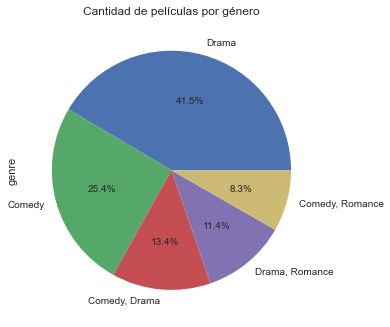

In [33]:
_=movies.genre.value_counts().head(5).plot.pie(title="Cantidad de películas por género", autopct='%1.1f%%')

**2. ¿Cómo se distribuyen las notas a lo largo del dataset?**

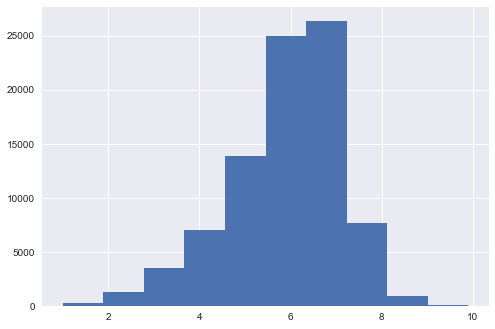

In [34]:
_=movies.avg_vote.hist()

In [25]:
movies.avg_vote.mean()

5.898655873274613

In [26]:
movies.avg_vote.mode()

0    6.4
dtype: float64

La nota más repetida a lo largo del dataset es 6.4. El promedio de notas es de 5.89, sin embargo a partir del histograma se observa que la mayoría de las películas tienen puntuaciones entre 6 y 8 por lo que el valor de la media se ve castigado por las notas bajas.

In [50]:
movies.avg_vote.max()

9.9

<AxesSubplot:>

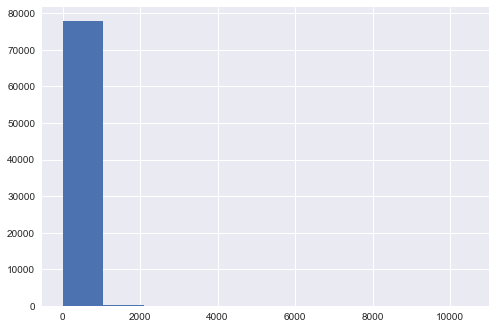

In [103]:
movies.reviews_from_users.hist()
#probablemente numero total de reviews

La nota promedio más alta es de 9.9.

#HELP: no entiendo la variable reviews

**3. ¿En qué año se publica la mayor cantidad de películas?**

In [65]:
movies.year.mode()

0    2017
dtype: object

Dado que la variable "year" es un object, se debe convertir a int para posterior análisis.

In [69]:
# HELP! No puedo convertir la columna en int para analizar con groupby
movies["year"]=movies["year"].astype(float)
print(movies.dtypes)

ValueError: could not convert string to float: 'TV Movie 2019'

In [105]:
movies["year"]=pd.to_numeric(movies["year"],errors='coerce')
print(movies.year.dtype)

float64


In [106]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85854 non-null  float64
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [66]:
movies.year.min()

'1894'

In [104]:
movies[movies.year == "TV Movie 2019"]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,rango
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0,37.0


<AxesSubplot:xlabel='year'>

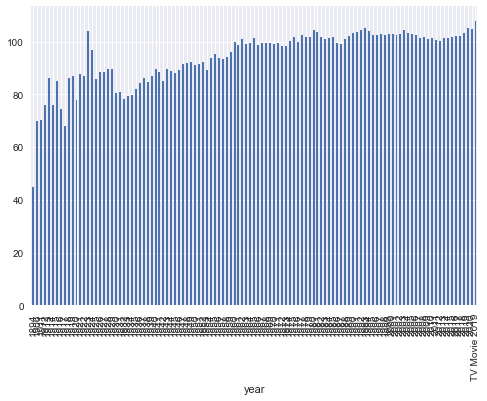

In [64]:
count_year = movies.groupby("year").duration.mean()
count_year.plot.bar()

**4. ¿De qué país son la mayoría de las películas?**

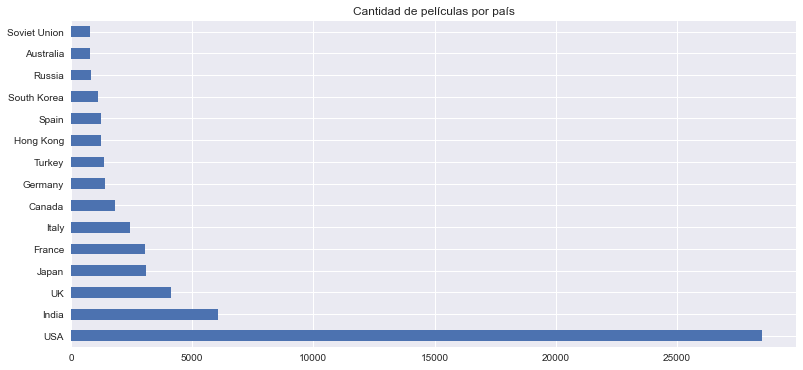

In [83]:
_=movies.country.value_counts().head(15).plot.barh(title="Cantidad de películas por país",figsize=(13,6))

In [82]:
movies.country.value_counts().head(15)

USA             28511
India            6065
UK               4111
Japan            3077
France           3055
Italy            2444
Canada           1802
Germany          1396
Turkey           1351
Hong Kong        1239
Spain            1225
South Korea      1103
Russia            802
Australia         785
Soviet Union      766
Name: country, dtype: int64

La mayoría de las películas son producidas por USA, seguido por India y UK.

### Parte 2
**_Hipótesis 1_** : La nota de los usuarios será similar a la de los críticos

In [77]:
movies.reviews_from_users.max()

10472.0

In [78]:
movies.reviews_from_critics.max()

999.0

In [88]:
# HELP 
# Intenté insertando una nueva columna con la idea de ver mas o menos cual era la diferencia entre los valores, si era proxima a 0 entonces las columnas se parecen

movies['rango'] = movies.reviews_from_users - movies.reviews_from_critics

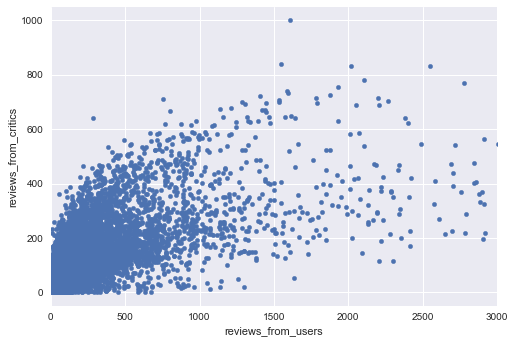

In [107]:
_=movies.plot.scatter(x="reviews_from_users",y="reviews_from_critics",xlim=(0,3000))

Conforme más críticos evalúan la película, más personas evalúan la película.

**_Hipótesis 2_** : Las películas con mejor puntuación serán aquellas de mayor presupuesto

ValueError: could not convert string to float: '$ 2250'

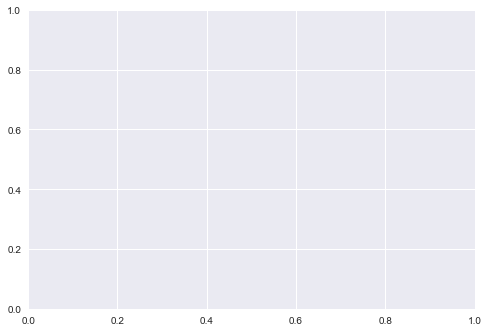

In [93]:
# Aquí tengo problemas con el tipo de budget
# Hacer limpieza, transformar columna a que sea solo float.

_=movies.plot.scatter(x="avg_vote",y="budget")

In [109]:
#Queremos extraer número y solo quedarnos con el número
movies.budget.head(10)

0           NaN
1        $ 2250
2           NaN
3       $ 45000
4           NaN
5           NaN
6           NaN
7     ITL 45000
8    ROL 400000
9       $ 30000
Name: budget, dtype: object

In [111]:
#Vamos a escribir función de limpieza que le vamos a aplicar a todas las columnas
#Valor va a ser un string
def limpiar_budget(valor):
    if not valor: #si valor no existe, retorna nada
        return None
    try:
        lista = valor.split(" ") #divide el valor que nos entró usando un espacio como separador
        return int(lista[1]) #nos retorna el segundo componente, que es el número. Con int aseguramos que retorne numero
    except:
        return valor 
movies["budget_num"]=movies.budget.apply(limpiar_budget)


In [113]:
movies.budget_num.dtype

dtype('float64')

In [119]:
def extraer_curr(valor):
    if not valor: #si valor no existe, retorna nada
        return None
    try:
        lista = valor.split(" ") #divide el valor que nos entró usando un espacio como separador
        return lista[0] #nos retorna el segundo componente, que es el número. Con int aseguramos que retorne numero
    except:
        return valor 
movies["budget_curr"]=movies.budget.apply(extraer_curr)

In [120]:
movies.budget_curr.head(10)

0    NaN
1      $
2    NaN
3      $
4    NaN
5    NaN
6    NaN
7    ITL
8    ROL
9      $
Name: budget_curr, dtype: object

In [121]:
#Currencies que existen dentro de Data Set
movies.budget_curr.unique()

array([nan, '$', 'ITL', 'ROL', 'SEK', 'FRF', 'NOK', 'GBP', 'DEM', 'PTE',
       'FIM', 'CAD', 'INR', 'CHF', 'ESP', 'JPY', 'DKK', 'NLG', 'PLN',
       'RUR', 'AUD', 'KRW', 'BEF', 'XAU', 'HKD', 'NZD', 'CNY', 'EUR',
       'PYG', 'ISK', 'IEP', 'TRL', 'HRK', 'SIT', 'PHP', 'HUF', 'DOP',
       'JMD', 'CZK', 'SGD', 'BRL', 'BDT', 'ATS', 'BND', 'EGP', 'THB',
       'GRD', 'ZAR', 'NPR', 'IDR', 'PKR', 'MXN', 'BGL', 'EEK', 'YUM',
       'MYR', 'IRR', 'CLP', 'SKK', 'LTL', 'TWD', 'MTL', 'LVL', 'COP',
       'ARS', 'UAH', 'RON', 'ALL', 'NGN', 'ILS', 'VEB', 'VND', 'TTD',
       'JOD', 'LKR', 'GEL', 'MNT', 'AZM', 'AMD', 'AED'], dtype=object)

In [123]:
movies.budget_curr.value_counts().head(20)

$      16602
EUR     2422
INR      906
GBP      743
CAD      632
AUD      258
SEK      154
NOK      140
FRF      133
DEM      126
BRL      114
FIM      113
DKK      110
RUR       91
CNY       69
HUF       68
PLN       68
EGP       68
IRR       64
TRL       61
Name: budget_curr, dtype: int64

In [ ]:
#QUEDARME CON 5
# Hacer tabla de traducción, limpieza con un transform

In [116]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85854 non-null  float64
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

### Parte 3
**¿Qué hace que una película sea exitosa?**

In [94]:
movies.corr()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,rango
duration,1.000000,0.242432,0.125618,0.210531,0.130836,0.135465,0.126847
avg_vote,0.242432,1.000000,0.166972,0.691338,0.138185,0.200526,0.102489
votes,0.125618,0.166972,1.000000,0.194730,0.766237,0.671635,0.672523
metascore,0.210531,0.691338,0.194730,1.000000,0.126131,0.236107,0.071514
reviews_from_users,0.130836,0.138185,0.766237,0.126131,1.000000,0.671634,0.958113
reviews_from_critics,0.135465,0.200526,0.671635,0.236107,0.671634,1.000000,0.431318
rango,0.126847,0.102489,0.672523,0.071514,0.958113,0.431318,1.000000


La mayor correlación es entre la variable votes y reviews_from_users, así como votes y reviews_from_critics. Sin embargo, esto se debe a que son variables dependientes.

In [100]:
mascaraUSA = movies.genre == "USA"
mascaraNota = movies.avg_vote > 6.4

movies[mascaraUSA & mascaraNota]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,rango


No hay peliculas en USA que tengan nota mayor a la moda. Por más que sea el país con mayor cantidad de películas, estas no son de alta nota.

In [99]:
#Aquí estoy sacando los 5 primeros, no necesariamente los más altos
movies[mascaraNota].head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,rango
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,17.0
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,3.0
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0,3.0
10,tt0002646,Atlantis,Atlantis,1913,1913-12-26,Drama,121,Denmark,Danish,August Blom,...,After Dr. Friedrich's wife becomes mentally un...,6.6,331,NaN,NaN,NaN,NaN,9.0,9.0,0.0
11,tt0002844,Fantômas - À l'ombre de la guillotine,Fantômas - À l'ombre de la guillotine,1913,1913-05-12,"Crime, Drama",54,France,French,Louis Feuillade,...,Inspector Juve is tasked to investigate and ca...,7.0,1944,NaN,NaN,NaN,NaN,9.0,28.0,-19.0


In [101]:
mascaraIndia = movies.genre == "India"
mascaraNota = movies.avg_vote > 6.4

movies[mascaraIndia & mascaraNota]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,rango
